# WL Affinity for SPEC CPU based on EMON SKX - 2D

## (Kind 1 = E core / KIND 0 = P core)

### PCA

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pca.pca import *
import pandas as pd

file_name = "post_silicon/skx_executions_emon/summary_e_p.csv"
df_data = pd.read_csv(file_name)
df_data.fillna(0,inplace=True)
display(df_data)

features = list(df_data.columns)[2:]
test_column = list(df_data.columns)[0]


pca_df = get_PCA(df_data,features)

,test_name,Kind,cpu_bound,cpi,branch_mispredict,retired_per_instr,llc_mpi,numa_reads_dram,upi_bw,fp_single_precision,...,fp_512_double_precision,frontend_bound,memory_bound,l1_bound,l2_bound,l3_bound,tma_data_sharing,store_bound,tma_core_bound,core_bound
0,603.bwaves,1,94.284162,3.818923,0.001057,0.000008,0.002399,17.813406,21152.994060,1.390000e-11,...,0,2.855501,76.468470,-4.205635,35.919342,5.442256,0.000066,13.411818,7.548197,7.548197
1,605.mcf,1,0.964317,1.512149,0.057629,0.000060,0.001810,0.062926,8.238895,0.000000e+00,...,0,19.279603,32.524523,6.222513,2.982297,14.371958,0.001092,1.533234,13.979341,13.979341
2,607.cactuBSSN,0,77.195533,2.674158,0.001628,0.000009,0.000755,43.350269,17910.240590,0.000000e+00,...,0,7.214291,59.428686,0.346170,9.708617,4.287639,0.000116,7.516600,13.825672,13.825672
3,619.lbm,0,90.914885,13.383025,0.017104,0.000019,0.033922,15.844129,23699.588330,0.000000e+00,...,0,3.045029,91.072939,0.541483,6.613485,4.535582,0.000052,68.717235,1.840425,1.840425
4,620.omnetpp,0,0.954782,1.111146,0.021358,0.000036,0.000131,1.008825,10.735693,0.000000e+00,...,0,21.751322,31.897589,6.015967,2.467798,21.241297,0.000442,1.122861,10.948779,10.948779
5,621.wrf,0,96.285554,5.901676,0.011980,0.000023,0.003831,46.907723,22660.246970,9.540024e-02,...,0,5.074608,76.040944,12.462811,2.915766,14.873351,0.007457,6.566515,9.583591,9.583591
6,623.xalancbmk,0,0.951576,0.744193,0.003745,0.000043,0.000084,9.534208,11.145109,0.000000e+00,...,0,16.629168,41.063631,14.538320,19.228681,7.591558,0.002236,0.168916,13.783786,13.783786
7,625.x264,0,0.967152,0.343586,0.015708,0.000040,0.000079,2.480315,17.092555,2.960000e-05,...,0,14.115317,2.821715,3.793765,0.420201,0.836290,0.000818,0.676579,10.193113,10.193113
8,627.cam4,0,86.174586,2.877667,0.007226,0.000022,0.002519,12.482659,3167.019233,4.740000e-05,...,0,6.732321,63.550709,12.140095,1.544658,2.845011,0.000194,23.026134,13.365425,13.365425
9,628.pop2,0,85.821820,10.620347,0.007894,0.000043,0.001274,25.496524,2766.186525,0.000000e+00,...,0,4.238429,74.346587,5.317337,0.844348,9.249450,0.001747,0.531158,16.575219,16.575219


## Explained variance

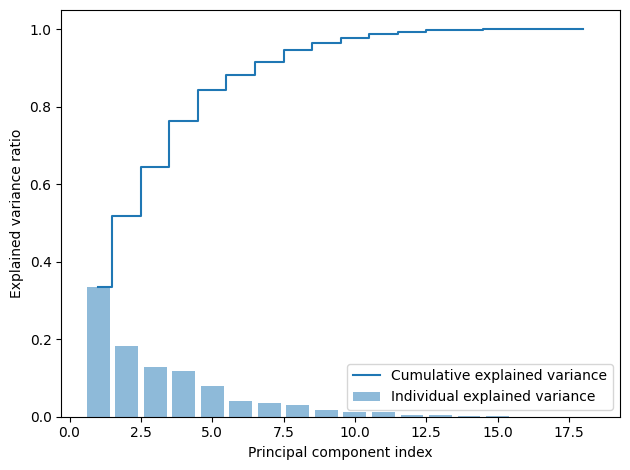

In [2]:
from pca.pca import *
x = get_features(df_data,features)
X_std = StandardScaler().fit_transform(x)
exp_var_pca = get_explained_variance(X_std)
plot_explained_variance(exp_var_pca)

## PCA plot 

,principal component 1,principal component 2,test_name
0,3.074365,-1.405333,603.bwaves
1,-2.741034,0.870436,605.mcf
2,1.831045,-0.326890,607.cactuBSSN
3,5.353051,-3.261415,619.lbm
4,-2.208841,0.574662,620.omnetpp
5,2.964608,6.575880,621.wrf
6,-1.826856,1.021719,623.xalancbmk
7,-2.399694,-0.387839,625.x264
8,0.487162,-0.296240,627.cam4
9,1.052766,1.598886,628.pop2


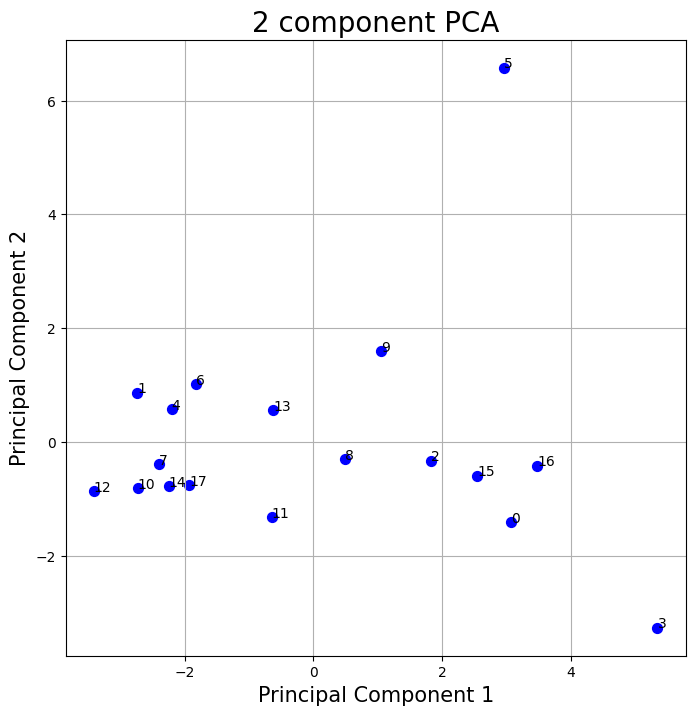

In [19]:
from pca.pca import *
display(pca_df)
plot_PCA(pca_df)

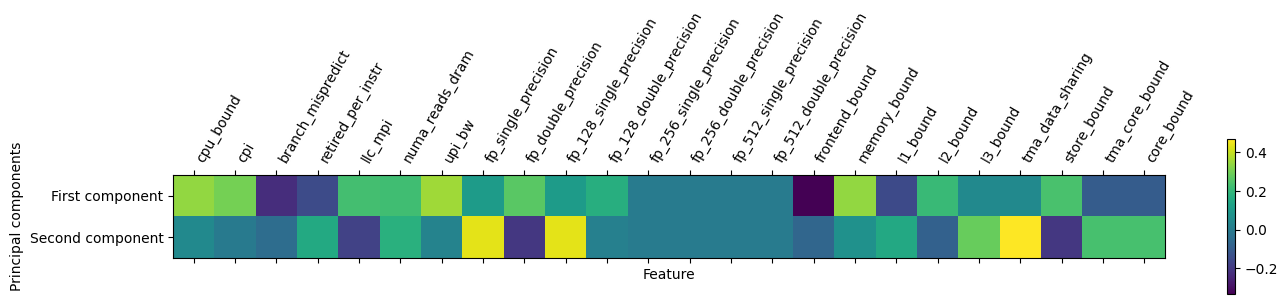

In [4]:
from pca.pca import *
plot_pca_vectors(X_std, features)

## Calculate optimal number of clusters

'Optimal number of clusters = 3'

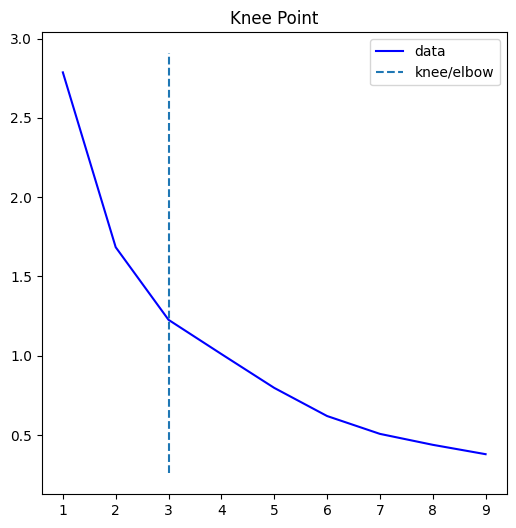

In [5]:
from clustering.distortion import *
from clustering.cluster_score import *
clusters = calculate_elbow(pca_df)[0]
display(f"Optimal number of clusters = {clusters}")

## Clasification based on sugested number of clusters


In [6]:
from clustering.clustering import *
df_result,kmeans = kmean_cluster(pca_df,7)

# create a DF based on KMEANS prediuction
df_clusters = df_result[['PRED', 'test_name']].copy()
df_clusters.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters["principal component 1"] = pca_df_sorted["principal component 1"].values
df_clusters["principal component 2"] = pca_df_sorted["principal component 2"].values
df_clusters.rename(columns={'PRED': 'cluster'}, inplace=True)
display(df_clusters)

# create a DF based on real known kind
df_clusters_ = df_data[['Kind', 'test_name']].copy()
df_clusters_.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted_ = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters_["principal component 1"] = pca_df_sorted_["principal component 1"].values
df_clusters_["principal component 2"] = pca_df_sorted_["principal component 2"].values
df_clusters_.rename(columns={'Kind': 'cluster'}, inplace=True)
display(df_clusters_)

,cluster,test_name,principal component 1,principal component 2
2,2,603.bwaves,3.074365,-1.405333
5,5,605.mcf,-2.741034,0.870436
2,2,607.cactuBSSN,1.831045,-0.326890
3,3,619.lbm,5.353051,-3.261415
5,5,620.omnetpp,-2.208841,0.574662
4,4,621.wrf,2.964608,6.575880
5,5,623.xalancbmk,-1.826856,1.021719
1,1,625.x264,-2.399694,-0.387839
6,6,627.cam4,0.487162,-0.296240
0,0,628.pop2,1.052766,1.598886


,cluster,test_name,principal component 1,principal component 2
0,1,603.bwaves,3.074365,-1.405333
1,1,605.mcf,-2.741034,0.870436
2,0,607.cactuBSSN,1.831045,-0.326890
3,0,619.lbm,5.353051,-3.261415
4,0,620.omnetpp,-2.208841,0.574662
5,0,621.wrf,2.964608,6.575880
6,0,623.xalancbmk,-1.826856,1.021719
7,0,625.x264,-2.399694,-0.387839
8,0,627.cam4,0.487162,-0.296240
9,0,628.pop2,1.052766,1.598886


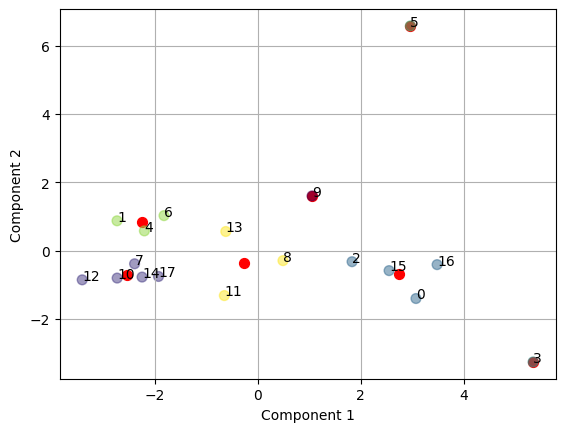

In [7]:
 plot_kmeans(pca_df, kmeans)

,cluster,test_name,principal component 1,principal component 2
0,1,603.bwaves,3.074365,-1.405333
1,1,605.mcf,-2.741034,0.870436
2,0,607.cactuBSSN,1.831045,-0.326890
3,0,619.lbm,5.353051,-3.261415
4,0,620.omnetpp,-2.208841,0.574662
5,0,621.wrf,2.964608,6.575880
6,0,623.xalancbmk,-1.826856,1.021719
7,0,625.x264,-2.399694,-0.387839
8,0,627.cam4,0.487162,-0.296240
9,0,628.pop2,1.052766,1.598886


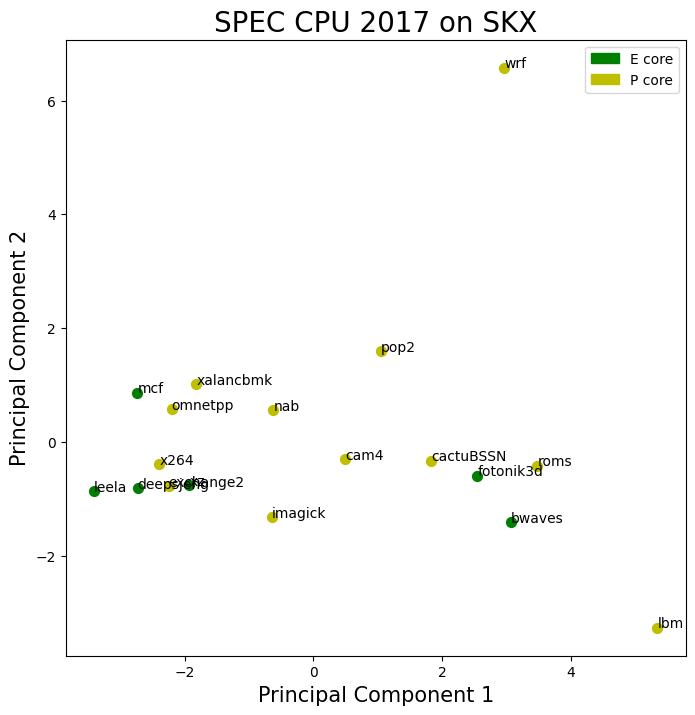

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(8, 8))

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('SPEC CPU 2017 on SKX', fontsize=20)

# Assuming df_clusters_ has columns 'principal component 1', 'principal component 2', 'cluster', and 'test_name'

# Assign colors based on cluster values
colors = np.where(df_clusters_["cluster"].astype(int) == 1, 'g', 'y')

# Create legend handles and labels
handles = [mpatches.Patch(color=color, label=label) for color, label in zip(['g', 'y'], ['E core', 'P core'])]
ax.legend(handles=handles, loc='upper right', prop={'size': 10})

# Scatter plot with annotated points using the second string after "."
for i, label in enumerate(df_clusters_['test_name']):
    label_parts = label.split(".")  # Split the string by "."
    if len(label_parts) > 1:  # Check if there is a second string after "."
        annotation_label = label_parts[1]  # Use the second part as the annotation label
        ax.scatter(df_clusters_['principal component 1'][i], df_clusters_['principal component 2'][i],
                   c=colors[i], s=50)
        ax.annotate(annotation_label, (df_clusters_['principal component 1'][i], df_clusters_['principal component 2'][i]))

# Save DataFrame to CSV file
df_clusters_.to_csv("df_clusters_.csv")

# Display the DataFrame
display(df_clusters_)

plt.show()


## Project new workload

In [9]:
from pca.pca import *


x = get_features(df_data,features)
mean_v = (StandardScaler().fit(x).mean_)
scale_v = (StandardScaler().fit(x).scale_)

filename_new_test = 'post_silicon/skx_benchdnn/benchdnn_gated_results.csv'
label_new = "benchdnn"
test_df = pd.read_csv(filename_new_test)
test_array = np.asarray(test_df['results'])
test_array_new = []
for count, element in enumerate(test_array):
    test_array_new.append((element - mean_v[count]) / scale_v[count])

eig_vecs = get_eigen(X_std)[1]

# get first 2 eigenvectors
v1 = (eig_vecs[:, 0])
v2 = (eig_vecs[:, 1])
vectors = np.column_stack((v1, v2))

# do projection
pcas = dot_product(vectors, test_array_new)


,cluster,test_name,principal component 1,principal component 2
0,1,603.bwaves,3.074365,-1.405333
1,1,605.mcf,-2.741034,0.870436
2,0,607.cactuBSSN,1.831045,-0.326890
3,0,619.lbm,5.353051,-3.261415
4,0,620.omnetpp,-2.208841,0.574662
5,0,621.wrf,2.964608,6.575880
6,0,623.xalancbmk,-1.826856,1.021719
7,0,625.x264,-2.399694,-0.387839
8,0,627.cam4,0.487162,-0.296240
9,0,628.pop2,1.052766,1.598886


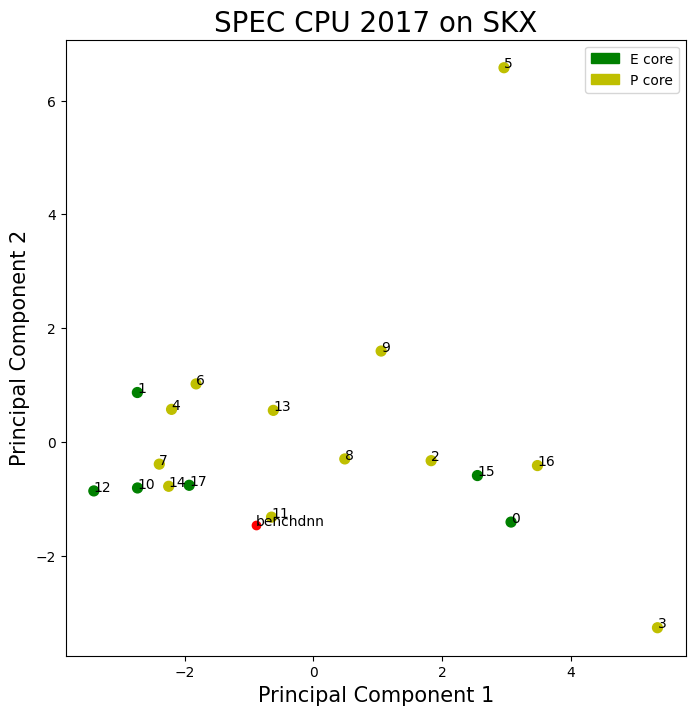

In [10]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('SPEC CPU 2017 on SKX', fontsize=20)
mydict = {'E core': 'g','P core': 'y'}
colors = np.where(df_clusters_["cluster"].astype(int)==1,'g','y')
fake_handles = [mpatches.Patch(color=item) for item in mydict.values()]

label = mydict.keys()
plt.legend(fake_handles, label, loc='upper right', prop={'size': 10})

ax.scatter(df_clusters_['principal component 1'],
               df_clusters_['principal component 2'],  c=colors, s=50)
for i, label in enumerate(df_clusters_['test_name']):
    plt.annotate(i, (df_clusters_['principal component 1'][i], df_clusters_['principal component 2'][i]))

plt.scatter(pcas[0], pcas[1], c='red')
plt.annotate(label_new, (pcas[0], pcas[1]))
display(df_clusters_)

## Use supervised ML to validate with testing and training data

In [11]:
display(df_clusters_)
# Use known kind based on SPEC documentation
X = df_clusters_[["principal component 1","principal component 2"]]
y = df_clusters_[["cluster"]]

# Use known kind based on KMEANS prediction
#X = df_clusters[["principal component 1","principal component 2"]]
#y = df_clusters[["cluster"]]

accuracy_results = {}


,cluster,test_name,principal component 1,principal component 2
0,1,603.bwaves,3.074365,-1.405333
1,1,605.mcf,-2.741034,0.870436
2,0,607.cactuBSSN,1.831045,-0.326890
3,0,619.lbm,5.353051,-3.261415
4,0,620.omnetpp,-2.208841,0.574662
5,0,621.wrf,2.964608,6.575880
6,0,623.xalancbmk,-1.826856,1.021719
7,0,625.x264,-2.399694,-0.387839
8,0,627.cam4,0.487162,-0.296240
9,0,628.pop2,1.052766,1.598886


### K-Nearest Neighbors Algorithm low accuracy

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn_score = 0

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train.values.ravel())
    knn_score += knn.score(X_test, y_test)

average_knn_score = knn_score / 10

print(f'Average knn.score = {average_knn_score}')

accuracy_results['knn_score'] = average_knn_score

Average knn.score = 0.5


In [13]:
y_pred = knn.predict([pcas])

if y_pred[0] == 0:
    cluster = "P core"
else:
    cluster = "E core"

print(f'ML suggests the new WL to be classified as {cluster}')


ML suggests the new WL to be classified as P core


/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### Decision Tree Algorithm

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_recall_fscore_support
from warnings import simplefilter

# Ignoring future warnings
simplefilter(action='ignore', category=FutureWarning)

def train_best_model(X, y):
    # Define the hyperparameters to search
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize the classifier
    clf = DecisionTreeClassifier()

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X, y)

    # Get the best model from the grid search
    best_clf = grid_search.best_estimator_
    return best_clf

def evaluate_model(X, y, loops, clf):
    precision_total = 0
    recall_total = 0
    f1_total = 0

    for _ in range(loops):
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict using the trained classifier
        y_pred = clf.predict(X_test)

        # Calculate precision, recall, and F1-score
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)

        # Accumulate scores
        precision_total += precision
        recall_total += recall
        f1_total += f1

    # Calculate averages
    avg_precision = precision_total / loops
    avg_recall = recall_total / loops
    avg_f1 = f1_total / loops

    return avg_precision, avg_recall, avg_f1

# Number of iterations
loops = 10

# Get the best model after hyperparameter tuning
best_clf = train_best_model(X, y)

# Evaluate the best model
precision_avg, recall_avg, f1_avg = evaluate_model(X, y, loops, best_clf)

# Printing and storing the results
print(f"Precision score {precision_avg}")
print(f"Recall score {recall_avg}")
print(f"F-beta score {f1_avg}")

accuracy_results['dt_precision_score'] = precision_avg
accuracy_results['dt_recall_score'] = recall_avg
accuracy_results['dt_fbeta_score'] = f1_avg


Precision score 0.8333333333333333
Recall score 0.75
F-beta score 0.7333333333333334


In [15]:
# Assuming X_train, y_train are your training data
# Assuming pcas is the new data point for prediction
# Assuming df_clusters is the DataFrame containing clusters

# Split data into train and test sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
best_clf.fit(X_train, y_train)

# Predict the cluster label for the new data point
y_pred = best_clf.predict([pcas])
print(y_pred)
# Display predicted cluster label
print(f'ML suggests the new WL to be classified as {y_pred[0]}')

# Find the row in df_clusters with the predicted cluster label
cluster_predicted = df_clusters_[df_clusters_['cluster'] == y_pred[0]]
display(cluster_predicted)

if y_pred[0] == 0:
    cluster = "P core"
else:
    cluster = "E core"

print(f'ML suggests the new WL to be classified as {cluster}')

[0]
ML suggests the new WL to be classified as 0


/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


,cluster,test_name,principal component 1,principal component 2
2,0,607.cactuBSSN,1.831045,-0.326890
3,0,619.lbm,5.353051,-3.261415
4,0,620.omnetpp,-2.208841,0.574662
5,0,621.wrf,2.964608,6.575880
6,0,623.xalancbmk,-1.826856,1.021719
7,0,625.x264,-2.399694,-0.387839
8,0,627.cam4,0.487162,-0.296240
9,0,628.pop2,1.052766,1.598886
11,0,638.imagick,-0.653439,-1.318818
13,0,644.nab,-0.624958,0.556900


ML suggests the new WL to be classified as P core


In [16]:
from sklearn import svm
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train are your training data
# Assuming pcas is the new data point for prediction
# Assuming df_clusters is the DataFrame containing clusters

# Split data into train and test sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM Classifier
clf = svm.SVC(kernel='linear')  # Linear Kernel
clf.fit(X_train, y_train.values.ravel())

# Predict the cluster label for the new data point
y_pred = clf.predict([pcas])

# Display predicted cluster label
print(f'ML suggests the new WL to be classified as {y_pred[0]}')

# Find the row in df_clusters with the predicted cluster label
cluster_predicted = df_clusters_[df_clusters_['cluster'] == y_pred[0]]
print(cluster_predicted)

# Determine cluster based on the predicted label
if y_pred[0] == 0:
    cluster = "P core"
else:
    cluster = "E core"

print(f'ML suggests the new WL to be classified as {cluster}')


ML suggests the new WL to be classified as 0
    cluster      test_name  principal component 1  principal component 2
2         0  607.cactuBSSN               1.831045              -0.326890
3         0        619.lbm               5.353051              -3.261415
4         0    620.omnetpp              -2.208841               0.574662
5         0        621.wrf               2.964608               6.575880
6         0  623.xalancbmk              -1.826856               1.021719
7         0       625.x264              -2.399694              -0.387839
8         0       627.cam4               0.487162              -0.296240
9         0       628.pop2               1.052766               1.598886
11        0    638.imagick              -0.653439              -1.318818
13        0        644.nab              -0.624958               0.556900
14        0  648.exchange2              -2.253584              -0.776928
16        0       654.roms               3.485291              -0.412944
ML sug

/usr/local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [17]:
from sklearn import svm

p_total = 0
r_total = 0
f_total = 0

clf = svm.SVC(kernel='linear') # Linear Kernel

for i in range(10):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Train the model using the training sets
    clf.fit(X_train, y_train.values.ravel())

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
            
    # Calculate precision, recall, and F1-score
    #p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
    
    # Accumulate scores for averaging
    p_total += p
    r_total += r
    f_total += f

# Calculate average precision, recall, and F1-score
avg_precision = p_total / 10
avg_recall = r_total / 10
avg_f1 = f_total / 10

# Store the average metrics in the results dictionary
accuracy_results['svm_precision_score'] = avg_precision
accuracy_results['svm_recall_score'] = avg_recall
accuracy_results['svm_fbeta_score'] = avg_f1

# Print the results
print(f"Average SVM Precision score: {avg_precision}")
print(f"Average SVM Recall score: {avg_recall}")
print(f"Average SVM F-beta score: {avg_f1}")


Average SVM Precision score: 0.5
Average SVM Recall score: 1.0
Average SVM F-beta score: 0.6666666666666667


,algorithm,accuracy
0,knn_score,0.500000
1,dt_precision_score,0.833333
2,dt_recall_score,0.750000
3,dt_fbeta_score,0.733333
4,svm_precision_score,0.500000
5,svm_recall_score,1.000000
6,svm_fbeta_score,0.666667


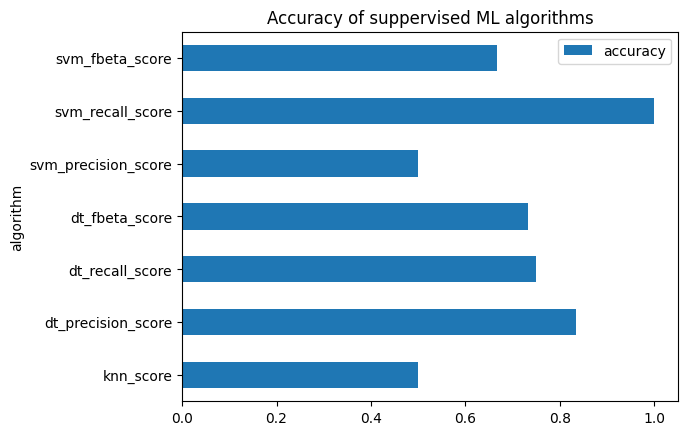

In [18]:

accuracy_results_df = pd.DataFrame(list(accuracy_results.items()),columns=['algorithm','accuracy'])
display(accuracy_results_df)
accuracy_results_df.plot.barh(x='algorithm', title = 'Accuracy of suppervised ML algorithms');